In [41]:
import numpy as np
import pylab
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick
%matplotlib inline
import datetime
from datetime import date
import seaborn as sb
import time
import scipy.stats as stats
from scipy.stats import mstats
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("Set2", 10)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [189]:
Batting = pd.read_csv('/Users/ezzan/Downloads/python_drills/Batting.csv')
Pitching = pd.read_csv('/Users/ezzan/Downloads/python_drills/Pitching.csv')
Salary= pd.read_csv('/Users/ezzan/Downloads/python_drills/Salaries.csv')
Award = pd.read_csv('/Users/ezzan/Downloads/python_drills/AwardsPlayers.csv')
Team = pd.read_csv('/Users/ezzan/Downloads/python_drills/Teams.csv')
HOF = pd.read_csv('/Users/ezzan/Downloads/python_drills/HallOfFame.csv')
AllStar= pd.read_csv('/Users/ezzan/Downloads/python_drills/AllstarFull.csv')
Fielding =pd.read_csv('/Users/ezzan/Downloads/python_drills/Fielding.csv')
Full =pd.read_csv('/Users/ezzan/Downloads/python_drills/Master.csv')
Appearances = pd.read_csv('/Users/ezzan/Downloads/python_drills/Appearances.csv')
Awards = pd.read_csv('/Users/ezzan/Downloads/python_drills/AwardsPlayers.csv')

In [190]:
HOF= HOF.sort_values('playerID')
HOF.drop(['needed_note'], axis=1, inplace=True)
HOF = HOF.loc[lambda HOF: HOF['category'] == 'Player', :]
HOF = HOF.loc[lambda HOF: HOF['inducted'] == 'Y', :]
Batting.drop(['CS','SH', 'GIDP', 'IBB'], axis=1, inplace=True)

In [44]:
HOF2 = HOF.loc[lambda HOF: HOF['inducted'] == 'N', :]

In [195]:
inductees = HOF.playerID.unique()
rejected = HOF2.playerID.unique()

In [196]:
#HOF= pd.merge(HOF, Batting, left_index=True, right_index=True, on='playerID', how='outer');
HOF = HOF.loc[lambda HOF: HOF['inducted'] == 'Y', :]
#HOF = HOF.merge(Batting, on='playerID',how='inner')
#HOF= HOF.loc[lambda HOF1: HOF1['category']=='Player']

In [208]:
#master1 = master1.loc[lambda master1: master1['category'] == 'Player', :]
#HOF1 = HOF1.loc[lambda HOF1: HOF1['votedBY'] != 'Negro League', :]
MasterID = pd.merge(Batting, HOF, on='playerID')
#HOF= HOF1.sort_values('playerID')
MasterID["avg."]=MasterID.H/MasterID.AB
MasterID["1B"]=(MasterID.H-MasterID["3B"]-MasterID["2B"])
MasterID["OBP"]= (MasterID.H + MasterID.BB + MasterID.HBP ) / (MasterID.AB + MasterID.BB + MasterID.HBP + MasterID.SF)
MasterID["OBP"]= (MasterID.H + MasterID.BB + MasterID.HBP ) / (MasterID.AB + MasterID.BB + MasterID.HBP + MasterID.SF)
MasterID["slug"]=(MasterID["1B"] + 2*MasterID["2B"] + MasterID["3B"]*3 + 4*MasterID.HR)/MasterID.AB
MasterID["OPS"] = MasterID.OBP + MasterID.slug


#HOF.drop(['teamID', 'lgID','ballots','needed', 'votes'], axis=1, inplace=True)
#Master1.drop(['category'])
#HOF1=HOF1.groupby(['playerID'])['HR']
MasterID = MasterID.sort_values('playerID')
careerstats = MasterID.groupby(['playerID']).sum()
seasonsplayed = MasterID.playerID.value_counts()
careerstats["Career Avg."] = careerstats['H']/careerstats['AB']
careerstats.drop(['yearID', 'yearid', 'ballots', 'needed', 'votes', 'avg.', 'OBP', 'slug', 'OPS'], axis=1, inplace=True)
careerstats["OBP"]= (careerstats.H + careerstats.BB + careerstats.HBP ) / (careerstats.AB + careerstats.BB + careerstats.HBP + careerstats.SF)
careerstats["slug"]=( careerstats["1B"] + 2* careerstats["2B"] +  careerstats["3B"]*3 + 4* careerstats.HR)/ careerstats.AB
careerstats["OPS"] =  careerstats.OBP +  careerstats.slug
careerstats

,stint,G,AB,R,H,2B,3B,HR,RBI,SB,...,IBB,HBP,SH,SF,GIDP,1B,Career Avg.,OBP,slug,OPS
playerID,,,,,,,,,,,,,,,,,,,,,
aaronha01,23,3298,12364,2174,3771,624,98,755,2297.0,240.0,...,293.0,32.0,21.0,121.0,328.0,3049,0.304998,0.373949,0.615577,0.989527
alexape01,22,703,1810,154,378,60,13,11,163.0,3.0,...,0.0,2.0,88.0,0.0,0.0,305,0.208840,0.241927,0.280663,0.522590
alomaro01,21,2379,9073,1508,2724,504,80,210,1134.0,474.0,...,62.0,50.0,148.0,97.0,206.0,2140,0.300231,0.371245,0.465998,0.837243
ansonca01,27,2523,10277,1996,3418,581,142,97,2076.0,276.0,...,0.0,32.0,27.0,0.0,0.0,2695,0.332587,0.392579,0.454510,0.847089
aparilu01,18,2601,10230,1335,2677,394,92,83,791.0,506.0,...,22.0,27.0,161.0,76.0,184.0,2191,0.261681,0.310778,0.350635,0.661413
applilu01,20,2422,8856,1319,2749,440,102,45,1116.0,179.0,...,0.0,11.0,74.0,0.0,129.0,2207,0.310411,0.399449,0.403455,0.802905
ashburi01,15,2189,8365,1322,2574,317,109,29,586.0,234.0,...,25.0,43.0,112.0,18.0,83.0,2148,0.307711,0.396405,0.385535,0.781940
averiea01,15,1668,6353,1224,2019,401,128,238,1164.0,70.0,...,0.0,33.0,55.0,0.0,7.0,1490,0.317803,0.394693,0.571069,0.965762
bagweje01,15,2150,7797,1517,2314,488,32,449,1529.0,202.0,...,155.0,128.0,3.0,102.0,221.0,1794,0.296781,0.407616,0.597922,1.005538


In [211]:
MasterID= MasterID.dropna()

Text(0.5,0,'Hrs Hit by Hall of Famers per season')

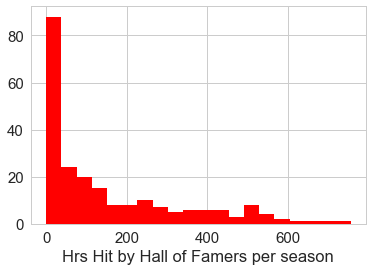

In [212]:
import matplotlib.pyplot as plt
plt.hist(careerstats['HR'].dropna(),bins=20, color = 'red')
plt.xlabel('Hrs Hit by Hall of Famers per season')


Text(0.5,0,'RBI by Hall of Famers')

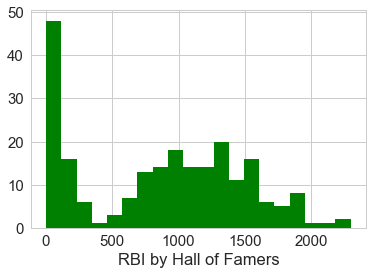

In [213]:
plt.hist(careerstats['RBI'].dropna(),bins=20, color = 'green')
plt.xlabel('RBI by Hall of Famers')

Text(0.5,0,'Career Hits by Hall of Famers')

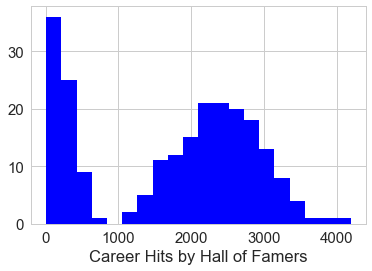

In [214]:
plt.hist(careerstats['H'].dropna(),bins = 20, color = 'blue')
plt.xlabel('Career Hits by Hall of Famers')

Text(0.5,0,'OBP by Hall of Famers')

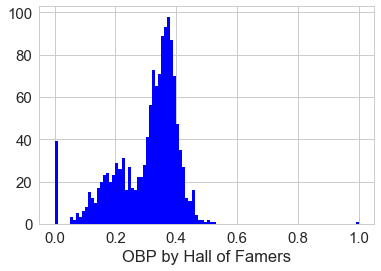

In [215]:
plt.hist(MasterID['OBP'].dropna(),bins=100, color = 'blue')
plt.xlabel('OBP by Hall of Famers')

Text(0.5,0,'Slugging Percentage by Hall of Famers per 100 games or more')

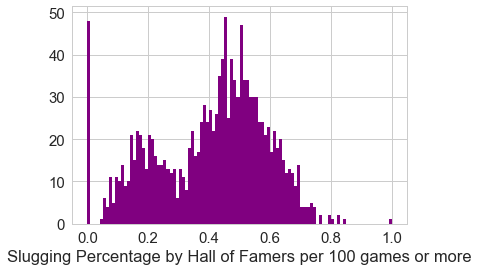

In [216]:
plt.hist(MasterID['slug'].dropna(),bins=100, color = 'purple')
plt.xlabel('Slugging Percentage by Hall of Famers per 100 games or more')

Text(0.5,0,'OPS by Hall of Famers per 100 games or more')

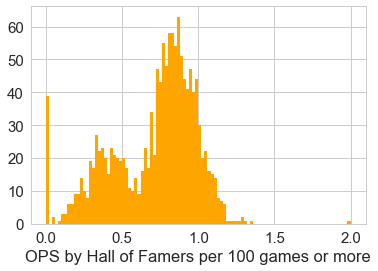

In [217]:
plt.hist(MasterID['OPS'].dropna(),bins=100, color = 'orange')
plt.xlabel('OPS by Hall of Famers per 100 games or more')

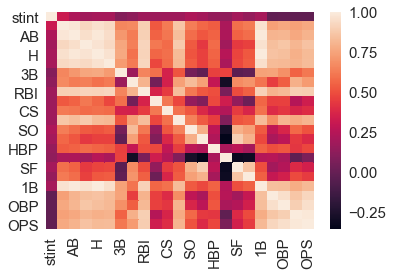

In [218]:
sb.heatmap(careerstats.corr())

#  Linear Regression

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

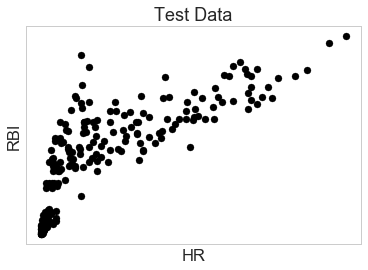

In [219]:

 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

Y = careerstats['RBI']
X = careerstats['HR']
 
X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)   
 
# Split the data into training/testing sets
X_train = X[:-400]
X_test = X[-400:]
 
# Split the targets into training/testing sets
Y_train = Y[:-400]
Y_test = Y[-400:]
 
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.title('Test Data')
plt.xlabel('HR')
plt.ylabel('RBI')
plt.xticks(())
plt.yticks(())

# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(X_train, Y_train)
 
# Plot outputs
plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)



plt.show()

In [220]:
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [221]:
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(179, 1) (179, 1)
(45, 1) (224, 1)


In [222]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)

In [223]:
predictions[0:10]

array([[ 421.83817356],
       [1280.29841292],
       [1517.31437127],
       [ 421.83817356],
       [2476.9399587 ],
       [ 462.30431279],
       [ 502.77045202],
       [ 739.78641036],
       [ 904.54140579],
       [ 494.09913647]])

ValueError: x and y must be the same size

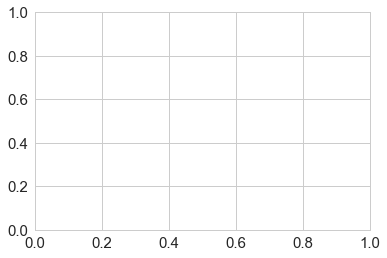

In [224]:
plt.scatter(Y_test, predictions)

In [225]:
print (model.score(X_test,Y_test))

ValueError: Found input variables with inconsistent numbers of samples: [224, 45]

In [226]:
MasterID.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,GIDP,avg.,yearid,ballots,needed,votes,1B,OBP,slug,OPS
count,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,...,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000
mean,1979.098612,1.027757,99.239591,341.991234,52.426589,96.256392,16.766983,2.447042,13.042367,50.186998,...,7.790358,0.240343,1996.262966,463.201607,347.783053,402.195033,77.042367,0.306615,0.405910,0.712526
std,14.324551,0.173005,53.362406,229.095896,41.456107,71.244047,13.528254,3.098105,13.477226,40.859624,...,6.633957,0.085069,13.796064,65.662583,49.257844,69.498406,56.671037,0.104023,0.182694,0.278199
min,1955.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1962.000000,160.000000,120.000000,124.000000,0.000000,0.000000,0.000000,0.000000
25%,1967.000000,1.000000,39.000000,85.000000,6.000000,15.000000,2.000000,0.000000,1.000000,6.000000,...,1.000000,0.196185,1984.000000,413.000000,310.000000,342.000000,13.000000,0.242424,0.261905,0.506333
50%,1978.000000,1.000000,119.000000,416.000000,58.000000,114.000000,18.000000,1.000000,9.000000,50.000000,...,7.000000,0.265625,1998.000000,447.000000,336.000000,396.000000,91.000000,0.337248,0.442197,0.785256
75%,1991.000000,1.000000,150.000000,552.000000,87.000000,159.000000,28.000000,4.000000,23.000000,85.000000,...,12.000000,0.295848,2009.000000,516.000000,387.000000,437.000000,128.000000,0.377916,0.536630,0.908996
max,2011.000000,3.000000,164.000000,691.000000,152.000000,240.000000,56.000000,20.000000,56.000000,148.000000,...,36.000000,1.000000,2017.000000,581.000000,436.000000,555.000000,195.000000,1.000000,1.000000,2.000000


In [227]:
MasterID.corr()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,GIDP,avg.,yearid,ballots,needed,votes,1B,OBP,slug,OPS
yearID,1.000000,0.102133,0.002569,0.028269,0.020816,0.038157,0.113235,-0.122242,-0.090306,-0.015818,...,0.080649,0.032366,0.887722,0.739523,0.739243,0.683188,0.027621,0.025045,-0.035734,-0.014102
stint,0.102133,1.000000,-0.191467,-0.159989,-0.133437,-0.147659,-0.134347,-0.095451,-0.110234,-0.141269,...,-0.112119,-0.085977,0.048699,0.018554,0.018292,0.021193,-0.148341,-0.080025,-0.075995,-0.079829
G,0.002569,-0.191467,1.000000,0.978433,0.927483,0.958776,0.895142,0.614582,0.742415,0.890167,...,0.786425,0.688578,0.012331,-0.014899,-0.013656,-0.003073,0.958044,0.701480,0.737516,0.746625
AB,0.028269,-0.159989,0.978433,1.000000,0.944561,0.984122,0.920039,0.653940,0.728004,0.890712,...,0.802803,0.722022,0.042741,0.016033,0.017255,0.030561,0.981813,0.715224,0.747638,0.758411
R,0.020816,-0.133437,0.927483,0.944561,1.000000,0.957965,0.903013,0.647229,0.796153,0.901033,...,0.732603,0.722525,0.048552,0.017257,0.018417,0.048769,0.953361,0.745362,0.791285,0.798344
H,0.038157,-0.147659,0.958776,0.984122,0.957965,1.000000,0.937595,0.677159,0.728042,0.896593,...,0.800822,0.760618,0.058905,0.032019,0.033194,0.050288,0.996314,0.740640,0.770718,0.783072
2B,0.113235,-0.134347,0.895142,0.920039,0.903013,0.937595,1.000000,0.590866,0.670546,0.845783,...,0.753127,0.713286,0.121220,0.086989,0.087982,0.099113,0.907681,0.695808,0.732473,0.741192
3B,-0.122242,-0.095451,0.614582,0.653940,0.647229,0.677159,0.590866,1.000000,0.371224,0.517796,...,0.425675,0.488407,-0.020642,0.004415,0.005330,-0.001027,0.655574,0.439444,0.454864,0.463026
HR,-0.090306,-0.110234,0.742415,0.728004,0.796153,0.728042,0.670546,0.371224,1.000000,0.916727,...,0.639299,0.552628,-0.084170,-0.126109,-0.124937,-0.086624,0.734894,0.600955,0.826436,0.767432
RBI,-0.015818,-0.141269,0.890167,0.890712,0.901033,0.896593,0.845783,0.517796,0.916727,1.000000,...,0.782294,0.684771,-0.014077,-0.046914,-0.045655,-0.020999,0.896945,0.700600,0.843313,0.815774


In [228]:
lr = LogisticRegression(C=1e9)


# Fit the model.
fit = lr.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_Y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_Y_sklearn, Y))

print('\n Percentage accuracy')
print(lr.score(X, Y))

C:\Users\ezzan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coefficients
[[-5.25243852e+00]
 [-5.25243852e+00]
 [-1.02799075e+00]
 [-2.73766874e-01]
 [-1.61708662e-01]
 [-5.25243852e+00]
 [-5.76919856e-01]
 [-5.25243852e+00]
 [-2.73766874e-01]
 [-2.73766874e-01]
 [-5.76919856e-01]
 [-1.61708662e-01]
 [-6.95722939e-02]
 [-1.33830196e-01]
 [-5.25243852e+00]
 [-8.58515232e-02]
 [-1.02799075e+00]
 [-1.61708662e-01]
 [-1.61708662e-01]
 [-1.61708662e-01]
 [-2.73766874e-01]
 [-7.05860477e-02]
 [-5.05065539e-02]
 [-1.61708662e-01]
 [-3.91928398e-01]
 [-8.58515232e-02]
 [-1.12202844e-01]
 [-1.63430031e-01]
 [-3.01174286e-02]
 [-3.29124193e-02]
 [-1.02799075e+00]
 [-5.05065539e-02]
 [-5.25243852e+00]
 [-1.12202844e-01]
 [-9.80876941e-02]
 [-5.84976094e-02]
 [-1.61708662e-01]
 [-1.26821070e-02]
 [-6.95722939e-02]
 [-2.60589713e-02]
 [-1.61708662e-01]
 [-3.29124193e-02]
 [-3.01174286e-02]
 [-1.56415763e-02]
 [-9.65589557e-03]
 [-8.58515232e-02]
 [-3.59153622e-02]
 [-5.84976094e-02]
 [-5.05065539e-02]
 [-2.73766874e-01]
 [-2.27258254e-02]
 [-5.05065539e-02]

Exception: Data must be 1-dimensional

# KNN Predictor

In [230]:
X, Y = careerstats, careerstats.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

AttributeError: 'DataFrame' object has no attribute 'target'

In [257]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(n_neighbors=5)
X = careerstats[['HR', 'RBI']]
Y = careerstats1.HR
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[240, 700]]))
print(neighbors.predict_proba([[240, 700]]))

ValueError: Found input variables with inconsistent numbers of samples: [224, 45]

In [38]:
lr = LogisticRegression(C=1e9)


# Fit the model.
fit = lr.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y))

print('\n Percentage accuracy')
print(lr.score(X, Y))

C:\Users\ezzan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coefficients
[[-7.54355090e+00]
 [-1.13383632e+00]
 [-1.31793373e+00]
 [-9.84253720e-01]
 [-6.72186038e-01]
 [-3.68790742e-01]
 [-3.42540319e-01]
 [-2.90779951e-01]
 [-2.47788073e-01]
 [-3.40515117e-01]
 [-2.23438053e-01]
 [-2.15505913e-01]
 [-1.13533948e-01]
 [-1.55569646e-01]
 [-1.55569646e-01]
 [-1.42530447e-01]
 [-1.12909182e-01]
 [-1.36691831e-01]
 [-1.38145862e-01]
 [-8.17261109e-02]
 [-7.34277113e-02]
 [-1.77886525e-01]
 [-1.30805919e-01]
 [-3.46510916e-02]
 [-5.55052160e-02]
 [-4.42049693e-02]
 [-3.77884648e-02]
 [-7.77413534e-02]
 [-6.94423915e-02]
 [-7.77413534e-02]
 [-6.56271995e-02]
 [-8.75723945e-02]
 [-5.08075946e-02]
 [-3.92591869e-02]
 [-2.13802415e-02]
 [-2.34529365e-02]
 [-4.02935274e-02]
 [-3.15577712e-02]
 [-2.84705345e-02]
 [-7.26435970e-02]
 [-2.18948873e-02]
 [-4.06134135e-02]
 [-4.10445899e-02]
 [-2.65839555e-02]
 [-3.99190424e-02]
 [-3.05519977e-02]
 [-2.56372813e-02]
 [-2.39408880e-02]
 [-2.99015090e-02]
 [-2.87387600e-02]
 [-3.35621967e-02]
 [-3.63035999e-02]

Exception: Data must be 1-dimensional

In [231]:
logisticregression = LogisticRegression(C=1e9)

# Fit the model.
fit = logisticregression.fit(X_train, Y_train)
predict_train = fit.predict(X_train)

# Cross-validate.
score = cross_val_score(logisticregression, X_train, Y_train, cv=4)

print(fit.score(X_train,Y_train))
print('\n Accuracy scores:')
print(score)
print('\n Average score:')
print(sum(score)/5)

C:\Users\ezzan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: n_splits=4 cannot be greater than the number of members in each class.

In [246]:
#admitted2 contains al the stats for HOF pitchers

master2= pd.merge(Pitching, HOF, left_index=True, right_index=True, on='playerID', how='inner');
master2 = master2.loc[lambda master2: master2['category'] == 'Player', :]
master2 = pd.merge(Pitching, HOF, on='playerID')
master2= master2.sort_values('playerID')
master2.drop(['teamID', 'lgID', 'votedBy', 'ballots','needed', 'votes'], axis=1, inplace=True)
admitted2 = master2.loc[master2.playerID.isin(inductees)]
admitted3 = master2.loc[~master2.playerID.isin(inductees)]
#admitted2.drop(["needed","yearID", "yearid","teamID", "ballots", "votes", "needed_note", "category", "votedBy"], axis=1, inplace=True)
admitted2 = admitted2.drop_duplicates()
admitted2 = admitted2.groupby(['playerID']).sum()
admitted2

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,yearid
playerID,,,,,,,,,,,,,,,,,,,,,
alexape01,40336,22,373,208,696,599,437,90,32,15570,...,39.0,70.0,1,20928.0,80.0,1851,0.0,0.0,0.0,40698
ansonca01,3767,2,0,1,3,0,0,0,1,12,...,0.0,0.0,0,21.0,3.0,5,0.0,0.0,0.0,3878
becklja01,1902,1,0,1,1,1,0,0,0,12,...,0.0,0.0,0,0.0,0.0,8,0.0,0.0,0.0,1971
bendech01,30575,16,212,127,459,334,255,40,34,9051,...,72.0,102.0,3,10124.0,109.0,1110,0.0,0.0,0.0,31248
blylebe01,47533,26,287,250,692,685,242,60,0,14910,...,114.0,155.0,19,20491.0,3.0,2029,0.0,0.0,0.0,48264
boggswa01,3996,2,0,0,2,0,0,0,0,7,...,0.0,0.0,0,11.0,2.0,1,0.0,0.0,0.0,4010
bresnro01,5708,3,4,1,9,6,3,1,0,151,...,0.0,3.0,0,16.0,3.0,30,0.0,0.0,0.0,5835
broutda01,3762,2,0,2,4,2,2,0,0,69,...,4.0,0.0,0,127.0,1.0,37,0.0,0.0,0.0,3890
brownmo01,28647,16,239,130,481,332,271,55,49,9517,...,59.0,63.0,4,12642.0,138.0,1044,0.0,0.0,0.0,29235


In [247]:
#neveradmitted2 contains all stats for not inducted pitchers

master3= pd.merge(Pitching, HOF2, left_index=True, right_index=True, on='playerID', how='inner');
master3 = master3.loc[lambda master3: master3['category'] == 'Player', :]
master3 = pd.merge(Pitching, HOF2, on='playerID')
master3= master3.sort_values('playerID')
#master3.drop(['teamID', 'lgID', 'votedBy', 'ballots','needed', 'votes'], axis=1, inplace=True)
admitted2 = master3.loc[master3.playerID.isin(inductees)]
neveradmitted2 = master3.loc[~master3.playerID.isin(inductees)]
neveradmitted2.drop(["needed","yearID", "yearid","teamID", "ballots", "votes", "needed_note", "category", "votedBy"], axis=1, inplace=True)
neveradmitted2 = neveradmitted2.drop_duplicates()
neveradmitted2 = neveradmitted2.groupby(['playerID']).sum()

C:\Users\ezzan\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## The National Baseball Hall of Fame and Museum is located in Cooperstown, New York and was dedicated in 1939. A baseball player can be elected to the Hall of Fame if they meet the following criteria:

-The player must have competed in at least ten seasons;

-The player has been retired for at least five seasons;

-A screening committee must approve the player’s worthiness to be included on the ballot and most players who played regularly for ten or more years are deemed worthy;

-The player must not be on the ineligible list (that means that the player should not be banned from baseball);

-A player is considered elected if he receives at least 75% of the vote in the election; and

-A player stays on the ballot the following year if they receive at least 5% of the vote and can appear on ballots for a maximum of 10 years.

In [314]:
HOF2 = HOF.loc[lambda HOF: HOF['category'] == 'Player', :]
HOF2 = HOF.loc[lambda HOF: HOF['inducted'] == 'N', :]

In [250]:

#neveramitted players who were not admitted to HOF
MasterID1 = pd.merge(Batting, HOF2, on='playerID', how="outer")
#MasterID1 = MasterID1.loc[lambda MasterID1: MasterID1['yearID'] > 1980, :]
MasterID1 = MasterID1.loc[lambda MasterID1: MasterID1['yearid'] > 2005, :]
MasterID1 = MasterID1.loc[lambda MasterID1: MasterID1['votes'] > 10, :]
MasterID1= MasterID1.sort_values('votes', ascending = False)
admitted = MasterID1.loc[MasterID1.playerID.isin(inductees)]
neveradmitted = MasterID1.loc[~MasterID1.playerID.isin(inductees)]
neveradmitted.drop(["needed","yearid","yearID", "teamID", "ballots", "votes", "needed_note", "category","avg.", "votedBy"], axis=1, inplace=True)
neveradmitted = neveradmitted.drop_duplicates()
neveradmitted = neveradmitted.groupby(['playerID']).sum()
neveradmitted

C:\Users\ezzan\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,
alomasa02,24.0,1377.0,4530.0,520.0,1236.0,249.0,10.0,112.0,588.0,25.0,24.0,212.0,499.0,15.0,41.0,48.0,34.0,132.0
baineha01,32.0,2830.0,9908.0,1299.0,2866.0,488.0,49.0,384.0,1628.0,34.0,34.0,1062.0,1441.0,187.0,14.0,9.0,99.0,298.0
belleal01,12.0,1539.0,5853.0,974.0,1726.0,389.0,21.0,381.0,1239.0,88.0,41.0,683.0,961.0,91.0,55.0,4.0,78.0,193.0
bondsba01,22.0,2986.0,9847.0,2227.0,2935.0,601.0,77.0,762.0,1996.0,514.0,141.0,2558.0,1539.0,688.0,106.0,4.0,91.0,165.0
brownke01,17.0,429.0,495.0,20.0,64.0,10.0,0.0,2.0,29.0,0.0,0.0,19.0,187.0,0.0,5.0,54.0,2.0,2.0
clarkwi02,17.0,1976.0,7173.0,1186.0,2176.0,440.0,47.0,284.0,1205.0,67.0,48.0,937.0,1190.0,155.0,59.0,13.0,101.0,100.0
clemero02,22.0,639.0,179.0,5.0,31.0,6.0,0.0,0.0,12.0,0.0,0.0,13.0,61.0,0.0,2.0,18.0,1.0,3.0
conceda01,19.0,2488.0,8723.0,993.0,2326.0,389.0,48.0,101.0,950.0,321.0,109.0,736.0,1186.0,93.0,21.0,74.0,86.0,266.0
coneda01,20.0,440.0,412.0,28.0,64.0,9.0,0.0,0.0,22.0,0.0,1.0,16.0,91.0,0.0,3.0,38.0,1.0,8.0


In [251]:

careerstats1 = neveradmitted.groupby(['playerID']).sum()
seasonsplayed1 = neveradmitted.playerID.value_counts()
careerstats1["Career Avg."] = careerstats1['H']/careerstats1['AB']
careerstats1["1B"]=(careerstats1.H-careerstats1["3B"]-careerstats1["2B"])
careerstats1["OBP"]= (careerstats1.H + careerstats1.BB + careerstats1.HBP ) / (careerstats1.AB + careerstats1.BB + careerstats1.HBP + careerstats1.SF)
careerstats1["slug"]=( careerstats1["1B"] + 2* careerstats1["2B"] +  careerstats1["3B"]*3 + 4* careerstats1.HR)/ careerstats1.AB
careerstats1["OPS"] =  careerstats1.OBP +  careerstats1.slug
careerstats1.drop(["yearID"])
careerstats1.head(100)

AttributeError: 'DataFrame' object has no attribute 'playerID'